# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json 
import os
%matplotlib inline

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#-- for the os.cwd() bit: 'https://stackoverflow.com/questions/5137497/find-the-current-directory-and-files-directory'
working_dir = os.getcwd()
with open(os.path.join(working_dir, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
image_pred = pd.read_csv('image-predictions.tsv',delimiter='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
df_list = []

with open('tweet_json.txt') as add_tweets:
    for line in add_tweets:
        tweet_id = json.loads(line[0:-1])['id']
        retweet_count = json.loads(line[0:-1])['retweet_count']
        favorite_count = json.loads(line[0:-1])['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'favorite_count': favorite_count})
extra_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# checking for duplicates
twitter_archive[(twitter_archive.duplicated()==True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
# checking for nulls
twitter_archive[(twitter_archive.isnull()==True)][:20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# checking for duplicates
image_pred[(image_pred.duplicated()==True)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
# checking for nulls
image_pred[(image_pred.isnull()==True)][:20]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
extra_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [18]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
# checking for duplicates
extra_data[(extra_data.duplicated()==True)]

,tweet_id,retweet_count,favorite_count


In [20]:
# checking for nulls
extra_data[(extra_data.isnull()==True)][:20]

,tweet_id,retweet_count,favorite_count
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


### Quality issues
1. The tweet ID column across all three dataframes is of integer type.

2. Timestamp is a string object.

3. Missing values in_reply_to_status_id  and in_reply_to_user_id.

4. Some missing records in the twitter_archive dataframe (Dog Stages) represented as 'None'.

5. Image number (img_num) in the image_pred dataframe is integer type.

6. retweeted_status_timestamp is string object.

7. retweet text in the twitter_archive dataframe.
8. retweeted_status_id and retweeted_status_user_id are float type.
 

### Tidiness issues
1. The rating is split in two different columns (numerator and denominator).

2. Unrequired columns in the image_pred and twitter_archive dataframes for analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
extra_data_clean = extra_data.copy()

### Quality

### Issue #1: The tweet ID column across all three dataframes is of integer type

#### Define: Change the tweet id column across dataframes to string type since no mathematical operation will be performed on tweet ids.

#### Code

In [22]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)
extra_data_clean['tweet_id'] = extra_data_clean['tweet_id'].astype(str)

#### Test

In [23]:
twitter_archive_clean['tweet_id'].dtype

dtype('O')

In [24]:
image_pred_clean['tweet_id'].dtype

dtype('O')

In [25]:
extra_data_clean['tweet_id'].dtype

dtype('O')

### Issue #2: Timestamp is a string object

#### Define: change timestamp data type to datetime 

#### Code

In [26]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [27]:
twitter_archive_clean['timestamp'].dtype

dtype('<M8[ns]')

### Issue #3:  Missing values in columns (in_reply_to_status_id , in_reply_to_user_id for analysis and expanded_urls)

#### Define: Drop both columns from the dataframe since we won't be needing them for analysis and there is no way to fill in the nulls

#### Code

In [28]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],axis=1,inplace=True)

#### Test

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 257.8+ KB


### Issue #4:  Some missing records in the twitter_archive dataframe represented as 'None'

#### Define: replace 'None' with np.nan for the dog stages

#### Code

In [30]:
twitter_archive_clean['doggo'] = twitter_archive_clean['doggo'].replace('None',np.nan)
twitter_archive_clean['floofer'] = twitter_archive_clean['floofer'].replace('None',np.nan)
twitter_archive_clean['pupper'] = twitter_archive_clean['pupper'].replace('None',np.nan)
twitter_archive_clean['puppo'] = twitter_archive_clean['puppo'].replace('None',np.nan)

#### Test

In [31]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #5:  Image number (img_num) is integer type

#### Define: change img_num to string type with .astype() since there will be no aggregation performed on the column

#### Code

In [32]:
image_pred_clean['img_num'] = image_pred['img_num'].astype(str)

#### Test

In [33]:
image_pred_clean['img_num'].dtype

dtype('O')

### Issue #6:  retweeted_status_timestamp is string object

#### Define: change retweeted_status_timestamp to datetime with pd.to_datetime()

#### Code

In [34]:
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

#### Test 

In [35]:
twitter_archive_clean['retweeted_status_timestamp'].dtype

dtype('<M8[ns]')

### Issue #7:  retweet text in the twitter_archive dataframe

#### Define: 
>- filter out retweet rows by checking rows for which retweeted_status_id column is not null.
>- assign the index of affected rows to a variable.
>- drop rows that contain rewteet text based on index (.drop(index))
>- drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns since there are no more retweet texts.

#### Code 

In [36]:
# Filtering out retweet rows with their indices
twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,12,10,None,NaN,NaN,NaN,NaN
36,885311592912609280,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,13,10,Shadow,NaN,NaN,NaN,NaN
74,878316110768087041,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,11,10,Terrance,NaN,NaN,NaN,NaN
78,877611172832227328,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,14,10,None,NaN,NaN,pupper,NaN
91,874434818259525634,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,12,10,Coco,NaN,NaN,NaN,NaN
95,873697596434513921,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,14,10,Walter,NaN,NaN,NaN,NaN
97,873337748698140672,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,12,10,Sierra,NaN,NaN,pupper,NaN


In [38]:
# Assigning the affect indices of retweet rows to a variable 'index'
index = list(twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()].index)

In [39]:
# Drop all rows where text is a retweet using the indices
twitter_archive_clean.drop(index=index,inplace=True)

#### Test

In [40]:
# Check for retweet columns again
twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8:  retweeted_status_id and retweeted_status_user_id are float type

#### Define: change retweeted_status_id and retweeted_status_user_id to string type using .astype()

#### Code

In [41]:
twitter_archive_clean['retweeted_status_id'] = twitter_archive_clean['retweeted_status_id'].astype(str)
twitter_archive_clean['retweeted_status_user_id'] = twitter_archive_clean['retweeted_status_user_id'].astype(str)

#### Test

In [42]:
twitter_archive_clean['retweeted_status_id'].dtype

dtype('O')

In [43]:
twitter_archive_clean['retweeted_status_user_id'].dtype

dtype('O')

### Tidiness 

### Issue #1:  The rating is split in two different columns (numerator and denominator)

#### Define: 
>- change the data type for rating denominator and numerator to string. 
>- merge the the rating rating numerator and denominator into a single column 'rating'
>- drop the rating numerator and rating denominator columns

#### Code

In [44]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(str)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(str)

In [45]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] + '/' + twitter_archive_clean['rating_denominator']

In [46]:
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

#### Test

In [47]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,Phineas,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,Tilly,NaN,NaN,NaN,NaN,13/10
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,Archie,NaN,NaN,NaN,NaN,12/10
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,Darla,NaN,NaN,NaN,NaN,13/10
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,Franklin,NaN,NaN,NaN,NaN,12/10


### Issue #2:  Unrequired columns in the image_pred and twitter_archive dataframes for analysis

##### Define: 
>- Rename added p1 column  from the image_pred dataframe.
>- Filter out only rows for which the neural network predicted actual dogs i.e. where p1_dog=True.
>- Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp since we no longer have retweets.
>- Use inner join to merge the three tables in two batches. The inner join return a uniform dataframe with corresponding entries across the three tables. 
>- Drop tweet_id column (duplicated across all three dataframes) and other unnecessary columns.

*---p1 column from the image_pred dataframe is assumed to be the dog breed since it is the most confident prediction*

#### Code

In [48]:
image_pred_clean.rename({'p1':'dog_breed'},axis=1,inplace=True)

In [49]:
image_pred_clean = image_pred_clean.query('p1_dog==True')

In [50]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [51]:
# First batch merge
first_merge = pd.merge(twitter_archive_clean,image_pred_clean,how='inner', on='tweet_id')

In [52]:
first_merge.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,dog_breed,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,13/10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN,12/10,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN,12/10,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,NaN,NaN,NaN,NaN,13/10,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,NaN,NaN,NaN,13/10,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [53]:
# Merging the first two columns with the third 
final_merge = pd.merge(first_merge,extra_data_clean,how='inner', on='tweet_id')

In [54]:
# Drop unrequired columns
final_merge.drop(['tweet_id','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog','doggo', 'floofer','pupper', 'puppo'],axis=1,inplace=True)

#### Test

In [55]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Data columns (total 10 columns):
timestamp         1477 non-null datetime64[ns]
source            1477 non-null object
text              1477 non-null object
name              1477 non-null object
rating            1477 non-null object
jpg_url           1477 non-null object
img_num           1477 non-null object
dog_breed         1477 non-null object
retweet_count     1477 non-null int64
favorite_count    1477 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 126.9+ KB


In [56]:
final_merge.head()

,timestamp,source,text,name,rating,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,13/10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
1,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
2,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,12/10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048
3,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,13/10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3261,20562
4,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,13/10,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2158,12041


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
final_merge.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
# Obtain the top 10 most popular dog breeds amongst dog owners
final_merge.groupby('dog_breed').text.count().sort_values(ascending=False)[:10]

dog_breed
golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: text, dtype: int64

In [59]:
# Obtain the top 10 least popular dog breeds amongst dog owners
final_merge.groupby('dog_breed').text.count().sort_values(ascending=True)[:10]

dog_breed
standard_schnauzer         1
silky_terrier              1
EntleBucher                1
groenendael                1
Japanese_spaniel           1
clumber                    1
Scotch_terrier             1
wire-haired_fox_terrier    2
toy_terrier                2
Appenzeller                2
Name: text, dtype: int64

In [60]:
# Obtain the highest count of likes for a dog breed
final_merge.favorite_count.max()

132810

In [61]:
# Filter out dog with the highest amount of likes
final_merge.query('favorite_count==132810')

,timestamp,source,text,name,rating,jpg_url,img_num,dog_breed,retweet_count,favorite_count
249,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,None,13/10,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,48265,132810


### Insights:
1. The golden retriever is the most popular dog breed amongst dog owners.

2. The least popular dog breeds are: standard schnauzer, silky terrier, EntleBucher, groenendael, Japanese spaniel, clumber, scotch terrier.   

3. The most loved dog based on the number of likes received, had its image posted on the 21st of January, 2017.

### Visualization

In [62]:
# Dataframe top 10 most popular dogs
most_popular_df = pd.DataFrame(final_merge.groupby('dog_breed').text.count().sort_values(ascending=False)[:10])
most_popular_df.rename({'text':'count'},axis=1,inplace=True)

In [63]:
# Dataframe top 10 most popular dogs
least_popular_df = pd.DataFrame(final_merge.groupby('dog_breed').text.count().sort_values(ascending=True)[:10])
least_popular_df.rename({'text':'count'},axis=1,inplace=True)

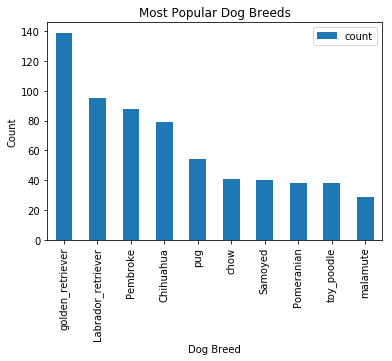

In [64]:
# Bar plot of top 10 most popular dog breeds
most_popular_df.plot(kind='bar')
plt.title('Most Popular Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

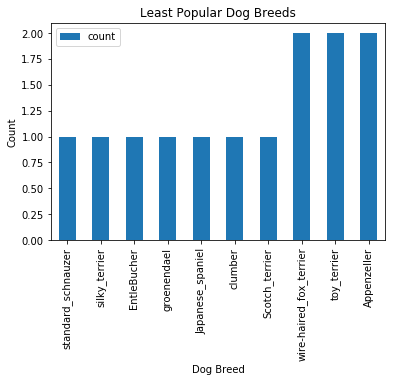

In [65]:
# Bar plot of top 10 most popular dog breeds
least_popular_df.plot(kind='bar')
plt.title('Least Popular Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Count');